# KMeans Clustering

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Generating Dataset
mean_01 = np.array([0, 1])
cov_01 = np.array([[0.6, 0.9], [0.9, 0.3]])

mean_02 = np.array([4,2])
cov_02 = np.array([[1.4, -0.32], [-0.32, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

/Users/Pratulya/Desktop/codingblocks/ml-dwarka/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


In [16]:
print(dist_01.shape, dist_02.shape)

(400, 2) (400, 2)


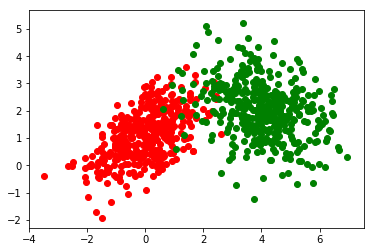

In [17]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.show()

In [29]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
dataset[:dist_01.shape[0], :] = dist_01
dataset[dist_01.shape[0]:, :] = dist_02
print(dataset.shape)

(800, 2)


### OOPS

In [50]:
class Person:
    
    def __init__(self, f, l="", age=0):
        self.first_name = f
        self.last_name = l
        self.age = age
    
    def __del__(self):
        print("Deleted")
    
    def __str__(self):
        return "{} {} [Age: {}]".format(self.first_name, self.last_name, self.age)

    def __repr__(self):
        return "{} {} [Age: {}]".format(self.first_name, self.last_name, self.age)

In [52]:
p1 = Person("Pratulya", "", 0)
p2 = Person("Rishabh", "Kapoor")
print(p1)

Deleted
Pratulya  [Age: 0]


In [198]:
class Cluster:
    cid = 0 # Cluster ID
    
    def __init__(self, center, color):
        self.center = center
        self.color = color
        self.points = list()
        self.id = Cluster.cid
        Cluster.cid += 1
        
    def __str__(self):
        return "Cluster {} {}".format(self.id, self.color)
    
    def update_center(self):
        if not self.points:
            return self.center
        new_center = np.array(self.points).mean(axis=0)
        self.center = new_center
        return self.center

In [220]:
class KMeans:
    
    def __init__(self, k, dataset, centers, colors):
        self.k = k
        self.centers = centers
        self.dataset = dataset
        self.clusters = list()
        self.colors = colors
        self.inertias = list()
        
        for center,color in zip(centers, colors):
            cluster = Cluster(center, color)
            self.clusters.append(cluster)
            
    def assign_clusters_to_points(self):
        for cluster in self.clusters:
            cluster.points = list() # Emptying list
        
        for point in dataset:
            distances = []
            for cluster in self.clusters:
                center = cluster.center
                d = KMeans.distance(point, center)
                distances.append((d, cluster))
            distances = sorted(distances, key=lambda x:x[0])
            closest_cluster = distances[0][1]
            closest_cluster.points.append(point)
            
        for cluster in self.clusters:
            print("{} has {} points.".format(cluster, len(cluster.points)))
                
    
    def update_cluster_centers(self):
        new_centers = []
        for cluster in self.clusters:
            new_centers.append(cluster.update_center())
        self.centers = np.array(new_centers)
    
    def run(self, iterations=1):
        for _ in range(iterations):
            self.assign_clusters_to_points()
            self.update_cluster_centers()
            self.calculate_inertia()
            
    def calculate_inertia(self):
        inertia = 0
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeans.distance(point, cluster.center)
        self.inertias.append(inertia)
            
    @staticmethod
    def distance(p1, p2):
        return np.sqrt(np.sum((p1-p2)**2))
    

In [221]:
# Executing KMeans
k = 5
random_centers = np.random.uniform(low=dataset.min(), high=dataset.max(), size=(k, dataset.shape[1]))
colors = ['red', 'green', 'blue', 'yellow', 'orange']

random_centers

array([[ 3.44645079,  1.73304644],
       [-3.24164528,  2.36012971],
       [ 2.78038557,  4.58557222],
       [ 4.76714275,  0.36204067],
       [-1.86414599,  1.18372288]])

In [222]:
kmeans = KMeans(k, dataset, random_centers, colors)
kmeans.centers

array([[ 3.44645079,  1.73304644],
       [-3.24164528,  2.36012971],
       [ 2.78038557,  4.58557222],
       [ 4.76714275,  0.36204067],
       [-1.86414599,  1.18372288]])

In [223]:
kmeans.inertias

[]

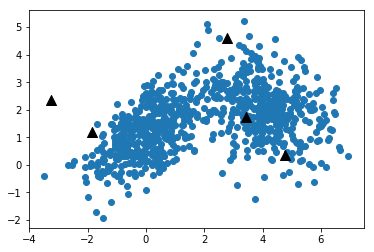

In [224]:
plt.figure()
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.scatter(random_centers[:,0], random_centers[:, 1], color='black', marker='^', s=100)
# plt.scatter(dataset.mean(axis=0)[:, 0], dataset.mean(axis=0)[:, 1], color='yellow', marker='*', s=100)
plt.show()

Cluster 5 red has 141 points.
Cluster 6 green has 187 points.
Cluster 7 blue has 133 points.
Cluster 8 yellow has 124 points.
Cluster 9 orange has 215 points.
Cluster 5 red has 136 points.
Cluster 6 green has 188 points.
Cluster 7 blue has 137 points.
Cluster 8 yellow has 125 points.
Cluster 9 orange has 214 points.
Cluster 5 red has 133 points.
Cluster 6 green has 192 points.
Cluster 7 blue has 137 points.
Cluster 8 yellow has 128 points.
Cluster 9 orange has 210 points.
Cluster 5 red has 133 points.
Cluster 6 green has 195 points.
Cluster 7 blue has 137 points.
Cluster 8 yellow has 128 points.
Cluster 9 orange has 207 points.
Cluster 5 red has 133 points.
Cluster 6 green has 195 points.
Cluster 7 blue has 137 points.
Cluster 8 yellow has 128 points.
Cluster 9 orange has 207 points.
Cluster 5 red has 133 points.
Cluster 6 green has 195 points.
Cluster 7 blue has 137 points.
Cluster 8 yellow has 128 points.
Cluster 9 orange has 207 points.
Cluster 5 red has 133 points.
Cluster 6 green 

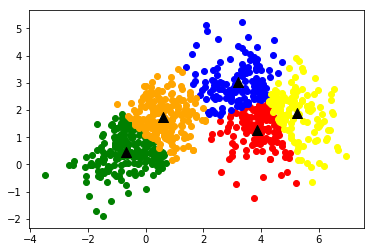

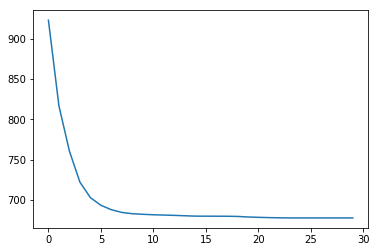

In [228]:
kmeans.run(10)
print(kmeans.inertias)
plt.figure()
for cluster in kmeans.clusters:
    print(cluster.center)
    points = np.array(cluster.points)
    print(points.shape)
    if len(points):
        plt.scatter(points[:, 0], points[:, 1], color=cluster.color)
    plt.scatter(cluster.center[0], cluster.center[1], color='black', s=100, marker='^')
    
plt.figure()
plt.plot(kmeans.inertias)
plt.show()

# SKLearn KMeans

In [211]:
from sklearn.cluster import KMeans as SK_KMeans

In [212]:
sk_kmeans = SK_KMeans(5)

In [213]:
sk_kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [217]:
sk_kmeans.labels_

array([0, 0, 3, 3, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 2, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0,
       3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 1, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3,
       3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 1, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       0, 3, 0, 1, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0,

In [218]:
sk_kmeans.cluster_centers_

array([[-0.655576  ,  0.46070572],
       [ 3.18393837,  3.01897398],
       [ 3.86410947,  1.25466428],
       [ 0.61609503,  1.73990676],
       [ 5.25799785,  1.89414001]])

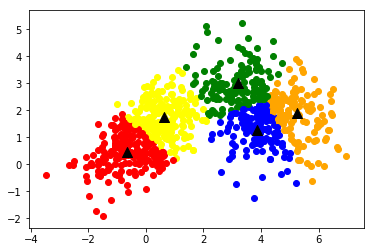

In [227]:
plt.figure()
for point,label in zip(dataset, sk_kmeans.labels_):
    plt.scatter(point[0], point[1], color=colors[label])
for center in sk_kmeans.cluster_centers_:
    plt.scatter(center[0], center[1], color='black', marker='^', s=100)
plt.show()